In [2]:
#| hide
!pip install -Uqq nixtla

In [3]:
#| hide
from nixtla.utils import in_colab

In [4]:
#| hide
IN_COLAB = in_colab()

In [5]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

# TimeGPT Quickstart

> TimeGPT is a production ready, generative pretrained transformer for time series. It's capable of accurately predicting various domains such as retail, electricity, finance, and IoT with just a few lines of code 🚀.

In [6]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/getting-started/2_quickstart')

## Step 1: Create a TimeGPT account and generate your API key

* Go to [dashboard.nixtla.io](https://dashboard.nixtla.io) to activate your free trial and set up an account.
* Sign in with Google, GitHub or your email
* Create your API key by going to 'API Keys' in the menu and clicking on 'Create New API Key'
* Your new key will appear. Copy the API key using the button on the right.

<img src="https://github.com/Nixtla/nixtla/blob/main/nbs/img/dashboard.png?raw=true" alt="Dashboard for TimeGPT API keys. Keys is in the middle, with trash and copy buttons on the right." width="700" />

## Step 2: Install Nixtla

In your favorite Python development environment:

Install `nixtla` with `pip`:
    
```shell
pip install nixtla
```

## Step 3: Import the Nixtla TimeGPT client

In [7]:
from nixtla import NixtlaClient

You can instantiate the `NixtlaClient` class providing your authentication API key.

In [8]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-xJGipZE30nfejfgqXlMh1OEeSelBU1BJP4clv2ewLjMwF9dqIxKr1U1rOBaL6NOExblsISNOpbKptD5N'
)

In [9]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

Check your API key status with the `validate_api_key` method.

In [10]:
nixtla_client.validate_api_key()

True

**This will get you started, but for more secure usage, see [Setting Up your API Key](https://docs.nixtla.io/docs/getting-started-setting_up_your_api_key).**

## Step 4: Start making forecasts!

Now you can start making forecasts! Let's import an example using the classic `AirPassengers` dataset. This dataset contains the monthly number of airline passengers in Australia between 1949 and 1960. First, load the dataset and plot it:

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('/content/merged_output.csv')
df.rename(columns={'TIME': 'ds', 'forecast': 'y'}, inplace=True)
df.head()

,Unnamed: 0,ds,y,"last_((0, 1, 0, 0))","last_((1, 0, 0, 0))","last_((2, 0, 0, 0))","last_((3, 0, 0, 0))","last_((4, 0, 0, 0))",weekend
0,0,2023-06-29 00:00:00,566.66925,569.970667,517.118500,605.691500,553.595667,521.980000,0.0
1,1,2023-06-29 00:15:00,563.60376,563.968667,523.224000,553.018333,542.394833,550.480167,0.0
2,2,2023-06-29 00:30:00,557.29510,569.087833,515.191833,532.766000,550.830500,538.250500,0.0
3,3,2023-06-29 00:45:00,546.50940,580.266500,514.648167,533.759667,530.523667,482.392500,0.0
4,4,2023-06-29 01:00:00,542.32007,569.869333,516.329000,529.262167,525.595333,468.970167,0.0


In [13]:
df['ds'] = pd.to_datetime(df['ds'])
df['unique_id'] = 'id1'
df = df[['unique_id', 'ds', 'y']]
df.head()

,unique_id,ds,y
0,id1,2023-06-29 00:00:00,566.66925
1,id1,2023-06-29 00:15:00,563.60376
2,id1,2023-06-29 00:30:00,557.29510
3,id1,2023-06-29 00:45:00,546.50940
4,id1,2023-06-29 01:00:00,542.32007


In [14]:
print(df.shape)

(45600, 3)


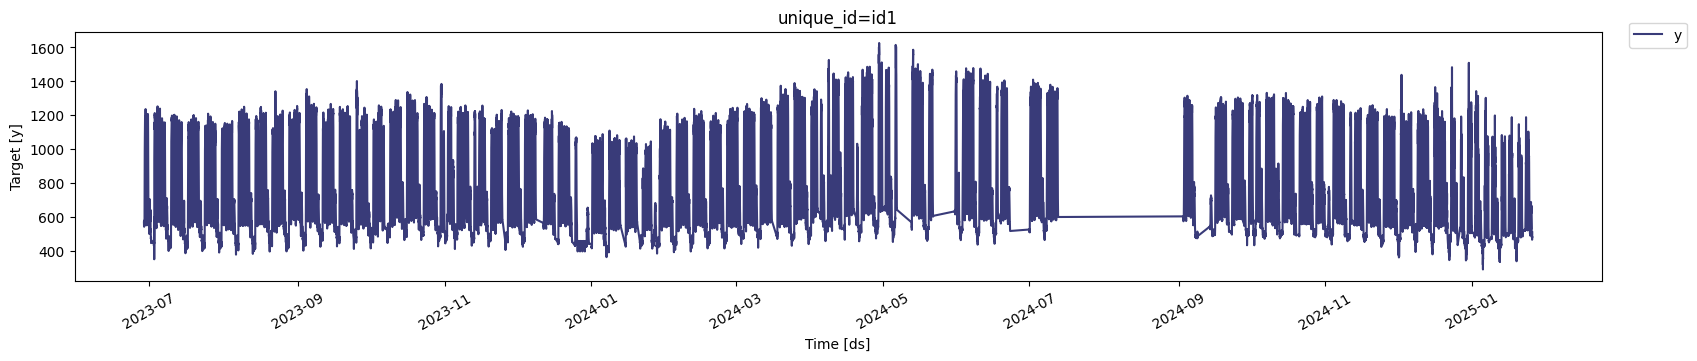

In [15]:
nixtla_client.plot(df, time_col='ds', target_col='y')

In [16]:
from utilsforecast.preprocessing import fill_gaps

In [17]:
df.isna().sum()

,0
unique_id,0
ds,0
y,0


In [18]:
# Ensure there are no duplicate timestamps within each unique_id
df = df.drop_duplicates(subset=['unique_id', 'ds'], keep='first')

# Then, try filling the gaps again:
print('Number of rows before filling gaps:', len(df))
df = fill_gaps(df, freq='15min')
print('Number of rows after filling gaps:', len(df))

Number of rows before filling gaps: 45120
Number of rows after filling gaps: 55392


In [19]:
# Check for missing timestamps
print(df['ds'].isnull().sum())

# Check for duplicate timestamps
print(df.duplicated(subset=['ds']).sum())

0
0


In [21]:
df['y'] = df['y'].interpolate(method='linear', limit_direction='both')

df.isna().sum() # check if there are any missing values

,0
unique_id,0
ds,0
y,0


In [22]:
df.head()

,unique_id,ds,y
0,id1,2023-06-29 00:00:00,566.66925
1,id1,2023-06-29 00:15:00,563.60376
2,id1,2023-06-29 00:30:00,557.29510
3,id1,2023-06-29 00:45:00,546.50940
4,id1,2023-06-29 01:00:00,542.32007


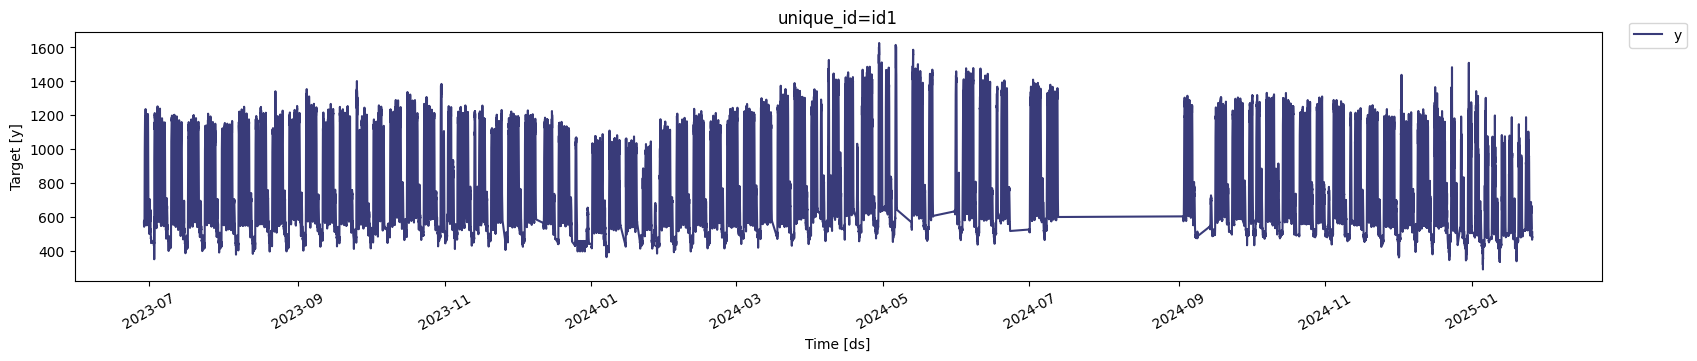

In [23]:
nixtla_client.plot(df, time_col='ds', target_col='y')

In [30]:
!pip install nbdev
from nbdev import show_doc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.2 MB/s eta 0:00:00


In [31]:
show_doc(nixtla_client.forecast)

---

[source](https://github.com/Nixtla/nixtla/blob/main/nixtla/nixtla_client.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### NixtlaClient.forecast

>      NixtlaClient.forecast (df:~AnyDFType, h:typing.Annotated[int,Gt(gt=0)],
>                             freq:Union[str,int,pandas._libs.tslibs.offsets.Bas
>                             eOffset,NoneType]=None, id_col:str='unique_id',
>                             time_col:str='ds', target_col:str='y',
>                             X_df:Optional[~AnyDFType]=None,
>                             level:Optional[list[Union[int,float]]]=None,
>                             quantiles:Optional[list[float]]=None,
>                             finetune_steps:typing.Annotated[int,Ge(ge=0)]=0,
>                             finetune_depth:Literal[1,2,3,4,5]=1, finetune_loss
>                             :Literal['default','mae','mse','rmse','mape','smap
>                             e']='default',
>                             finetuned_model_id:Optional[str]=None,
>                             clean_ex_first:bool=True,
>                             hist_exog_list:Optional[list[str]]=None,
>                             validate_api_key:bool=False,
>                             add_history:bool=False, date_features:Union[bool,l
>                             ist[Union[str,Callable]]]=False, date_features_to_
>                             one_hot:Union[bool,list[str]]=False, model:Literal
>                             ['azureai','timegpt-1','timegpt-1-long-
>                             horizon']='timegpt-1', num_partitions:Optional[Ann
>                             otated[int,Gt(gt=0)]]=None,
>                             feature_contributions:bool=False)

*Forecast your time series using TimeGPT.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | AnyDFType |  | The DataFrame on which the function will operate. Expected to contain at least the following columns:<br>- time_col:<br>    Column name in `df` that contains the time indices of the time series. This is typically a datetime<br>    column with regular intervals, e.g., hourly, daily, monthly data points.<br>- target_col:<br>    Column name in `df` that contains the target variable of the time series, i.e., the variable we<br>    wish to predict or analyze.<br>Additionally, you can pass multiple time series (stacked in the dataframe) considering an additional column:<br>- id_col:<br>    Column name in `df` that identifies unique time series. Each unique value in this column<br>    corresponds to a unique time series. |
| h | Annotated |  | Forecast horizon. |
| freq | Union | None | Frequency of the timestamps. If `None`, it will be inferred automatically.<br>See [pandas' available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). |
| id_col | str | unique_id | Column that identifies each serie. |
| time_col | str | ds | Column that identifies each timestep, its values can be timestamps or integers. |
| target_col | str | y | Column that contains the target. |
| X_df | Optional | None | DataFrame with [`unique_id`, `ds`] columns and `df`'s future exogenous. |
| level | Optional | None | Confidence levels between 0 and 100 for prediction intervals. |
| quantiles | Optional | None | Quantiles to forecast, list between (0, 1).<br>`level` and `quantiles` should not be used simultaneously.<br>The output dataframe will have the quantile columns<br>formatted as TimeGPT-q-(100 * q) for each q.<br>100 * q represents percentiles but we choose this notation<br>to avoid having dots in column names. |
| finetune_steps | Annotated | 0 | Number of steps used to finetune learning TimeGPT in the<br>new data. |
| finetune_depth | Literal | 1 | The depth of the finetuning. Uses a scale from 1 to 5, where 1 means little finetuning,<br>and 5 means that the entire model is finetuned. |
| finetune_loss | Literal | default | Loss function to use for finetuning. Options are: `default`, `mae`, `mse`, `rmse`, `mape`, and `smape`. |
| finetuned_model_id | Optional | None | ID of previously fine-tuned model to use. |
| clean_ex_first | bool | True | Clean exogenous signal before making forecasts using TimeGPT. |
| hist_exog_list | Optional | None | Column names of the historical exogenous features. |
| validate_api_key | bool | False | If True, validates api_key before sending requests. |
| add_history | bool | False | Return fitted values of the model. |
| date_features | Union | False | Features computed from the dates.<br>Can be pandas date attributes or functions that will take the dates as input.<br>If True automatically adds most used date features for the<br>frequency of `df`. |
| date_features_to_one_hot | Union | False | Apply one-hot encoding to these date features.<br>If `date_features=True`, then all date features are<br>one-hot encoded by default. |
| model | Literal | timegpt-1 | Model to use as a string. Options are: `timegpt-1`, and `timegpt-1-long-horizon`.<br>We recommend using `timegpt-1-long-horizon` for forecasting<br>if you want to predict more than one seasonal<br>period given the frequency of your data. |
| num_partitions | Optional | None | Number of partitions to use.<br>If None, the number of partitions will be equal<br>to the available parallel resources in distributed environments. |
| feature_contributions | bool | False |  |
| **Returns** | **AnyDFType** |  | **DataFrame with TimeGPT forecasts for point predictions and probabilistic<br>predictions (if level is not None).** |

In [24]:
df.shape

df.to_csv("processed_data.csv")

In [25]:
train_df = df.iloc[:-96]
test_df = df.iloc[-96:]

In [26]:
print(train_df.shape)
print(test_df.shape)

(55296, 3)
(96, 3)


In [27]:
timegpt_fcst_df = nixtla_client.forecast(df=train_df, h=len(test_df), time_col='ds', freq="15min", target_col='y')
timegpt_fcst_df.head()

,unique_id,ds,TimeGPT
0,id1,2025-01-25 00:00:00,569.82460
1,id1,2025-01-25 00:15:00,577.85364
2,id1,2025-01-25 00:30:00,585.71340
3,id1,2025-01-25 00:45:00,592.48910
4,id1,2025-01-25 01:00:00,598.12520


In [28]:
len(test_df)
test_df.head()

,unique_id,ds,y
55296,id1,2025-01-25 00:00:00,506.07443
55297,id1,2025-01-25 00:15:00,503.39390
55298,id1,2025-01-25 00:30:00,502.18225
55299,id1,2025-01-25 00:45:00,502.47916
55300,id1,2025-01-25 01:00:00,503.29060


In [29]:
len(train_df)
train_df.head()

,unique_id,ds,y
0,id1,2023-06-29 00:00:00,566.66925
1,id1,2023-06-29 00:15:00,563.60376
2,id1,2023-06-29 00:30:00,557.29510
3,id1,2023-06-29 00:45:00,546.50940
4,id1,2023-06-29 01:00:00,542.32007


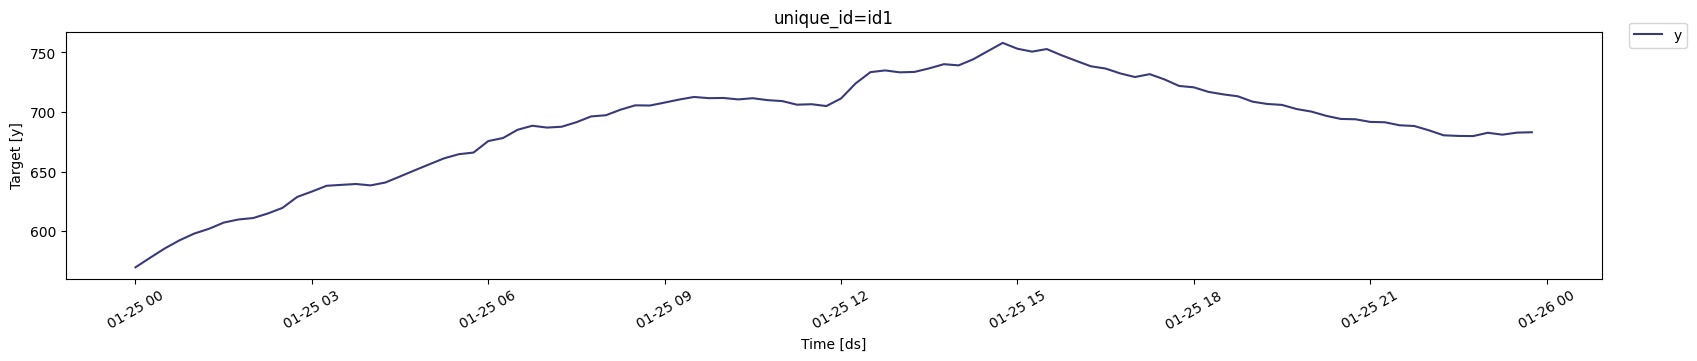

In [30]:
timegpt_fcst_df_alone = timegpt_fcst_df.rename(columns={"TimeGPT":'y'})
nixtla_client.plot(timegpt_fcst_df_alone)

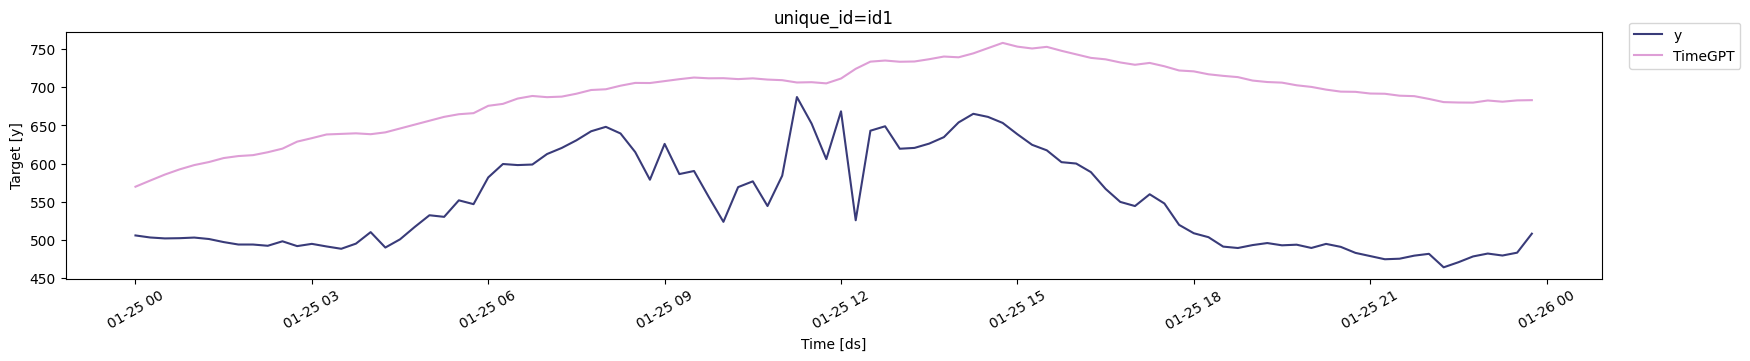

In [31]:
nixtla_client.plot(test_df, timegpt_fcst_df, time_col='ds', target_col='y')

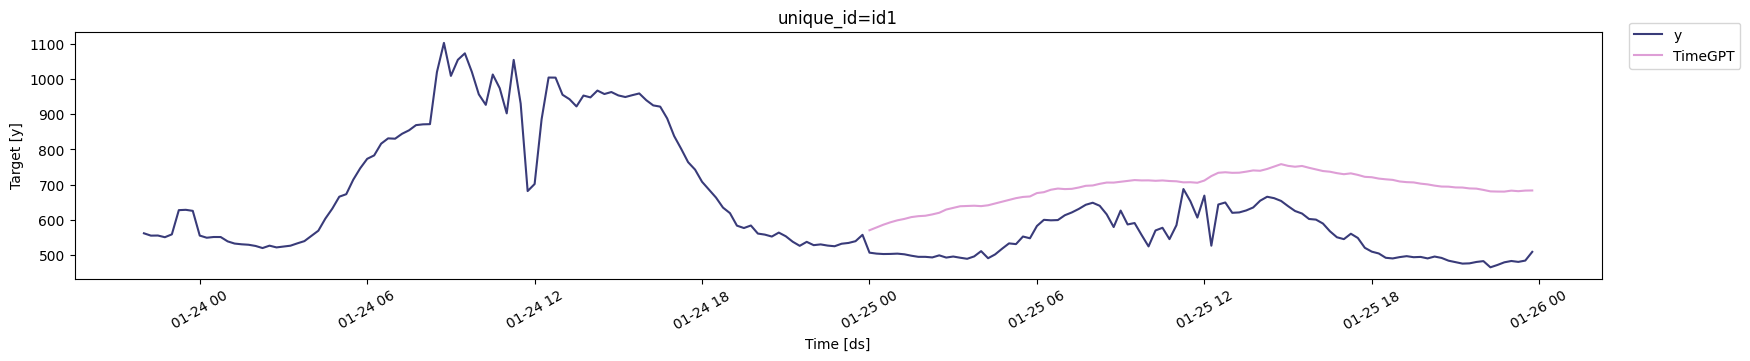

In [32]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='ds', target_col='y', max_insample_length=200)


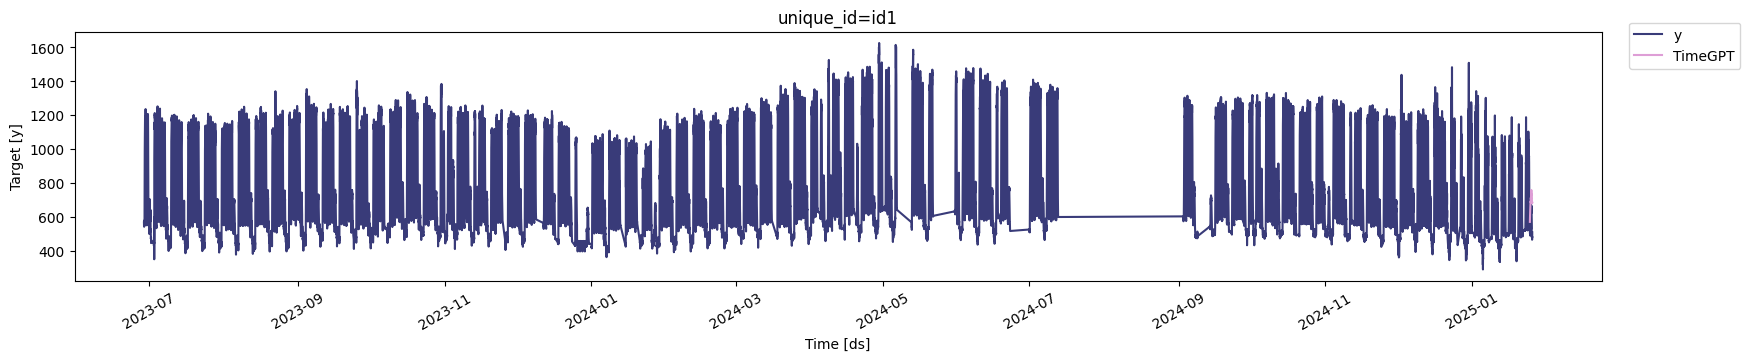

In [33]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='ds', target_col='y')

# with weeked feature

In [37]:
timegpt_fcst_hist_ex_vars_df = nixtla_client.forecast(
    df=df,
    h=len(test_df),
    level=[80, 90],
    hist_exog_list=['last_((0, 1, 0, 0))', 'last_((1, 0, 0, 0))', 'last_((2, 0, 0, 0))', 'last_((3, 0, 0, 0))', 'last_((4, 0, 0, 0))', 'weekend'],
)
timegpt_fcst_hist_ex_vars_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,id1,2025-01-26 00:00:00,526.13840,573.69880,589.52650,478.57810,462.75040
1,id1,2025-01-26 00:15:00,534.74650,648.39484,687.69180,421.09820,381.80124
2,id1,2025-01-26 00:30:00,540.94403,679.11910,829.09576,402.76898,252.79228
3,id1,2025-01-26 00:45:00,543.45685,702.57810,846.61300,384.33557,240.30072
4,id1,2025-01-26 01:00:00,547.25540,694.12494,807.86914,400.38580,286.64160


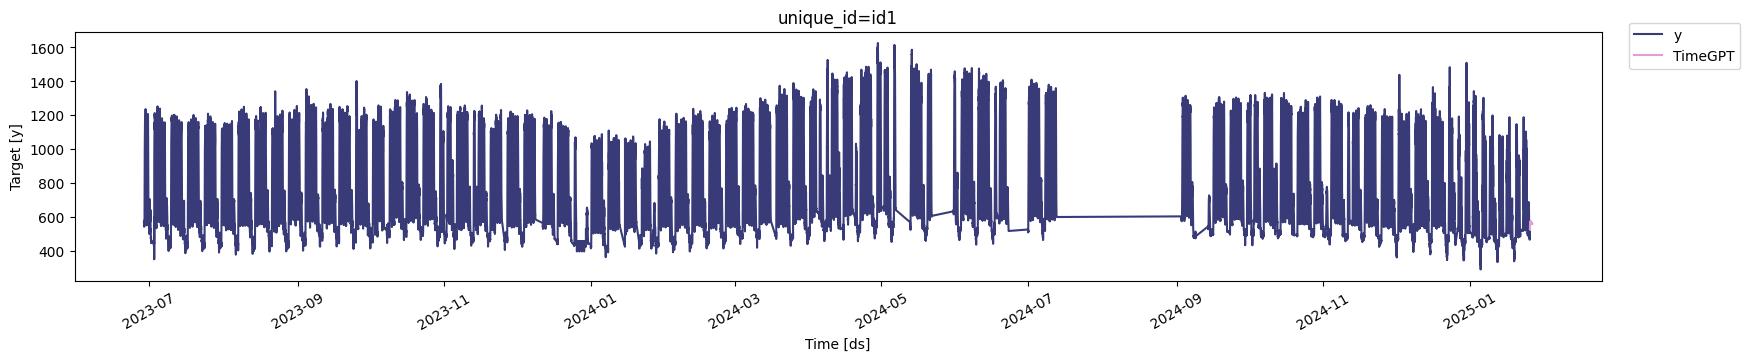

In [38]:
nixtla_client.plot(df, timegpt_fcst_hist_ex_vars_df, time_col='ds', target_col='y')

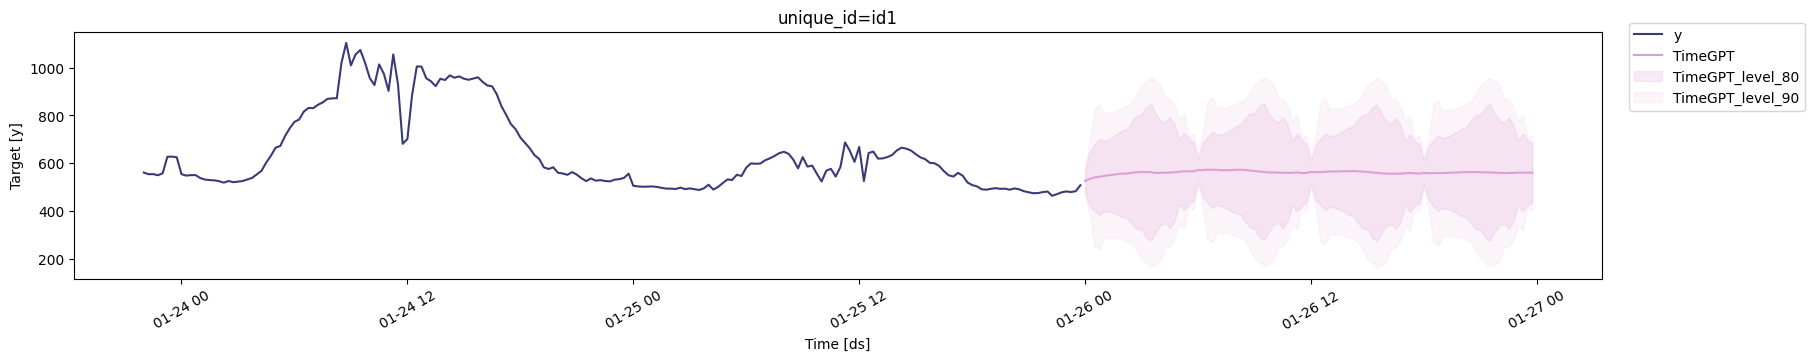

In [39]:
nixtla_client.plot(
    df[['unique_id', 'ds', 'y']],
    timegpt_fcst_hist_ex_vars_df,
    max_insample_length=200,
    level=[80, 90],
)

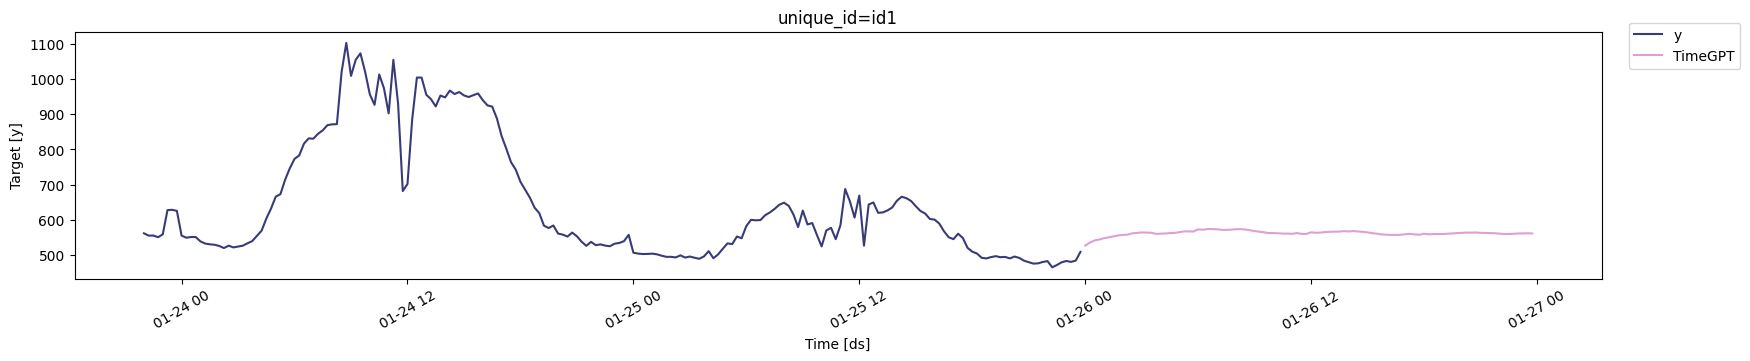

In [40]:
nixtla_client.plot(df, timegpt_fcst_hist_ex_vars_df, time_col='ds', target_col='y', max_insample_length=200)

 # without weekend as one of the features

In [41]:
timegpt_fcst_hist_ex_vars_df = nixtla_client.forecast(
    df=df,
    h=len(test_df),
    level=[80, 90],
    hist_exog_list=['last_((0, 1, 0, 0))', 'last_((1, 0, 0, 0))', 'last_((2, 0, 0, 0))', 'last_((3, 0, 0, 0))', 'last_((4, 0, 0, 0))'],
)
timegpt_fcst_hist_ex_vars_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,id1,2025-01-26 00:00:00,526.13840,573.69880,589.52650,478.57810,462.75040
1,id1,2025-01-26 00:15:00,534.74650,648.39484,687.69180,421.09820,381.80124
2,id1,2025-01-26 00:30:00,540.94403,679.11910,829.09576,402.76898,252.79228
3,id1,2025-01-26 00:45:00,543.45685,702.57810,846.61300,384.33557,240.30072
4,id1,2025-01-26 01:00:00,547.25540,694.12494,807.86914,400.38580,286.64160


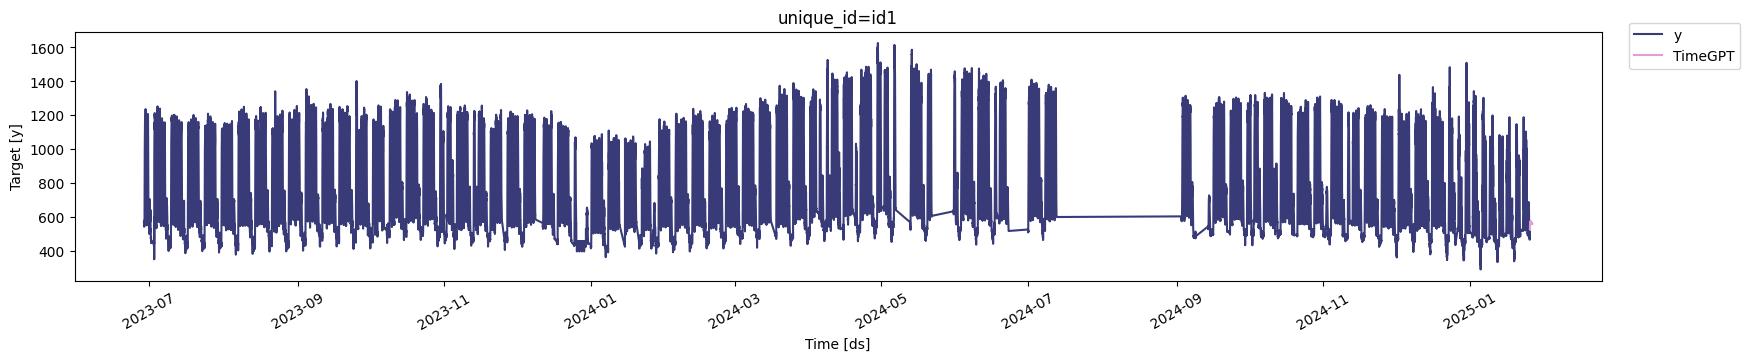

In [42]:
nixtla_client.plot(df, timegpt_fcst_hist_ex_vars_df, time_col='ds', target_col='y')

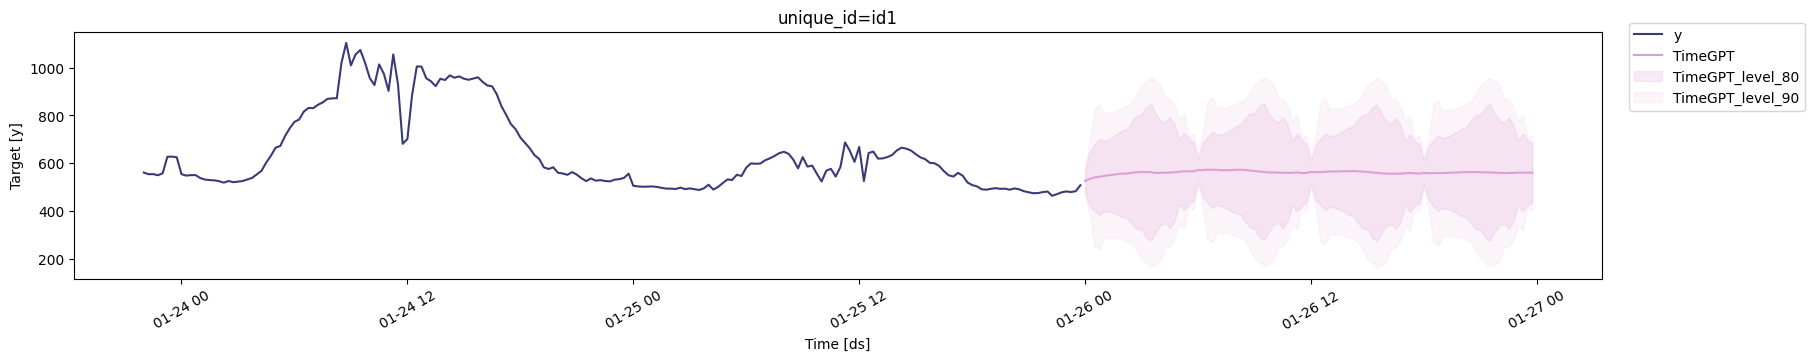

In [43]:
nixtla_client.plot(
    df[['unique_id', 'ds', 'y']],
    timegpt_fcst_hist_ex_vars_df,
    max_insample_length=200,
    level=[80, 90],
)

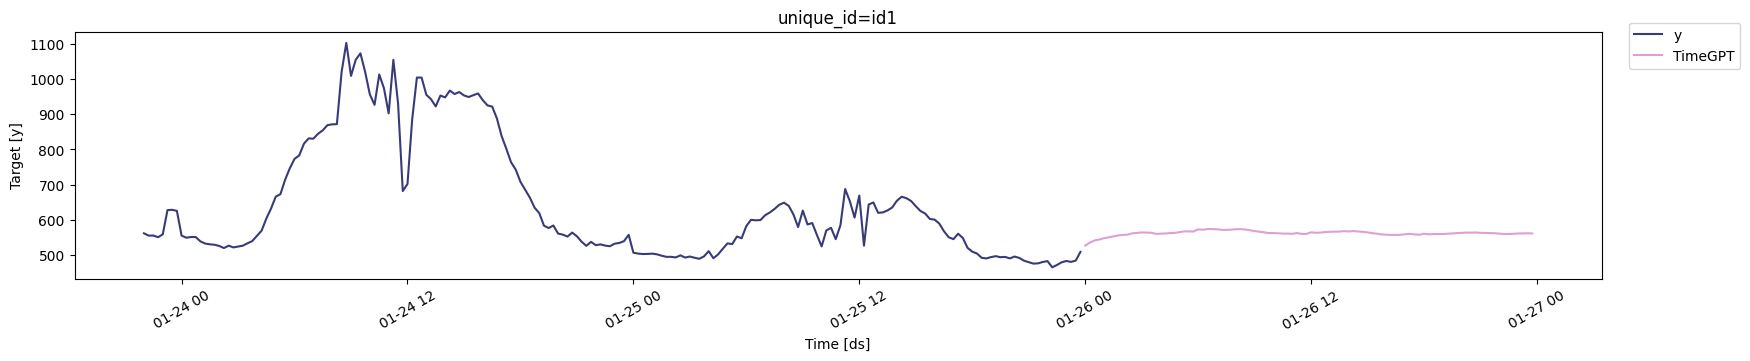

In [44]:
nixtla_client.plot(df, timegpt_fcst_hist_ex_vars_df, time_col='ds', target_col='y', max_insample_length=200)